combination:
pair= (([(1, 0.7, 7.6), (1, 1.2, 9.5), (1, 2.3, 9.1), (1, 1.5, 8.4)], 'bo'), ([(1, 7.6, 0.7), (1, 9, 1.9), (1, 8.1, 3), (1, 7.1, 2.2)], 'rx'))
c1[0]= [(1, 0.7, 7.6), (1, 1.2, 9.5), (1, 2.3, 9.1), (1, 1.5, 8.4)]
c2[0]= [(1, 7.6, 0.7), (1, 9, 1.9), (1, 8.1, 3), (1, 7.1, 2.2)]
data1 [((1, 0.7, 7.6), 1), ((1, 1.2, 9.5), 1), ((1, 2.3, 9.1), 1), ((1, 1.5, 8.4), 1)]
data2 [((1, 0.7, 7.6), 1), ((1, 1.2, 9.5), 1), ((1, 2.3, 9.1), 1), ((1, 1.5, 8.4), 1), ((1, 7.6, 0.7), 0), ((1, 9, 1.9), 0), ((1, 8.1, 3), 0), ((1, 7.1, 2.2), 0)]
classifier:
 (array([-4.37685960e-04, -1.63467759e+00,  1.67402826e+00]), ('bo', 'rx'))
classifier_set:
 [(array([-4.37685960e-04, -1.63467759e+00,  1.67402826e+00]), ('bo', 'rx'))]
pair= (([(1, 0.7, 7.6), (1, 1.2, 9.5), (1, 2.3, 9.1), (1, 1.5, 8.4)], 'bo'), ([(1, 6, 9.1), (1, 8, 7.8), (1, 8.1, 9), (1, 8.2, 9.2)], 'g*'))
c1[0]= [(1, 0.7, 7.6), (1, 1.2, 9.5), (1, 2.3, 9.1), (1, 1.5, 8.4)]
c2[0]= [(1, 6, 9.1), (1, 8, 7.8), (1, 8.1, 9), (1, 8.2, 9.2)]
data1 [((

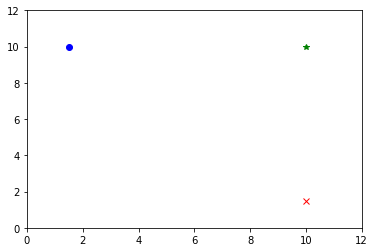

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient(dataset, w):
    g = np.zeros(len(w))
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        g += (error - y) * x
    return g / len(dataset)

def logistic(dataset):
    w = np.zeros(3)
    limit = 10
    eta = 1
    for i in range(limit):
        w = w - eta * gradient(dataset, w)
        eta *= 0.9
    return w
def vote(data):
    result = []
    for classifier, labels in classifier_set:
     if classifier.T.dot(data) > 0:
         result += [labels[0]]
     else:
         result += [labels[1]]
    count_map = {}
    for r in result:
     count_map[r] = count_map.get(r, 0) + 1
    #選出最高票的進行回傳

    return sorted(count_map.items(), key=lambda x: x[1], reverse=True)[0][0]
class1 = [(1, 0.7, 7.6), (1, 1.2, 9.5), (1, 2.3, 9.1), (1, 1.5, 8.4)]
class2 = [(1, 7.6, 0.7), (1, 9, 1.9), (1, 8.1, 3), (1, 7.1, 2.2)]
class3 = [(1, 6, 9.1), (1, 8, 7.8), (1, 8.1, 9), (1, 8.2, 9.2)]
dataset = [(class1, 'bo'), (class2, 'rx'), (class3, 'g*')]
training_class_set = itertools.combinations(dataset, 2)
print('combination:\n',training_class_set)
classifier_set = []
for pair_class in training_class_set:
    print("pair=",pair_class)
    c1, c2 = pair_class
    print('c1[0]=',c1[0])
    print('c2[0]=',c2[0])
    training_data = [ (v, 1) for v in c1[0]]
    print('data1',training_data)
    training_data += [ (v, 0) for v in c2[0]]
    print('data2',training_data)
    w=logistic(training_data)
    classifier = (w, (c1[1], c2[1]))
    print("classifier:\n",classifier)
    classifier_set += [classifier]
    print("classifier_set:\n",classifier_set)
test_data = [(1, 10, 10), (1, 1.5, 10), (1, 10, 1.5)]
for data in test_data:
    label = vote(data)
    print('data',data,'result:',vote(data))
    plt.plot(data[1], data[2], label)
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

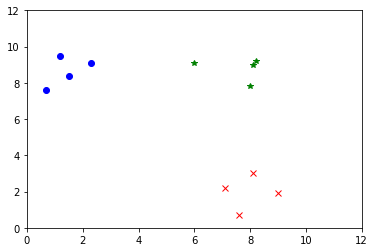

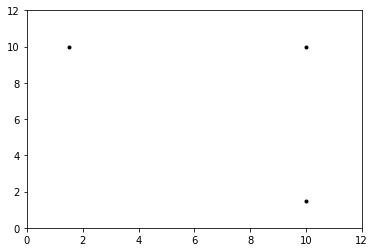

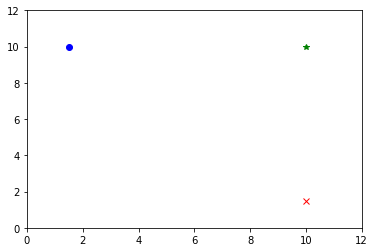

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import itertools


###
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient(dataset, w):
    g = np.zeros(len(w))
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        g += (error - y) * x
    return g / len(dataset)

def logistic(dataset):
    w = np.zeros(3)
    limit = 10
    eta = 1
    for i in range(limit):
        w = w - eta * gradient(dataset, w)
        eta *= 0.9
    return w
###


class1 = [(1, 0.7, 7.6), (1, 1.2, 9.5), (1, 2.3, 9.1), (1, 1.5, 8.4)]
class2 = [(1, 7.6, 0.7), (1, 9, 1.9), (1, 8.1, 3), (1, 7.1, 2.2)]
class3 = [(1, 6, 9.1), (1, 8, 7.8), (1, 8.1, 9), (1, 8.2, 9.2)]
dataset = [(class1, 'bo'), (class2, 'rx'), (class3, 'g*')]


def ovo(dataset, binary_classifier):
    training_class_set = itertools.combinations(dataset, 2)
    classifier_set = []
    for pair_class in training_class_set:
        c1, c2 = pair_class
        training_data = [ (v, 1) for v in c1[0]]
        training_data += [ (v, 0) for v in c2[0]]
        classifier = (binary_classifier(training_data), (c1[1], c2[1]))
        classifier_set += [classifier]

    def vote(data):
         result = []
         for classifier, labels in classifier_set:
             if classifier.T.dot(data) > 0:
                 result += [labels[0]]
             else:
                 result += [labels[1]]
         count_map = {}
         for r in result:
             count_map[r] = count_map.get(r, 0) + 1
         return sorted(count_map.items(), key=lambda x: x[1], reverse=True)[0][0]
    return vote

multiple_classifier = ovo(dataset, logistic)

plt.plot([v[1] for v in class1 ], [v[2] for v in class1 ],'bo')
plt.plot([v[1] for v in class2 ], [v[2] for v in class2 ],'rx')
plt.plot([v[1] for v in class3 ], [v[2] for v in class3 ],'g*')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

test_data = [(1, 10, 10), (1, 1.5, 10), (1, 10, 1.5)]
for data in test_data:
    plt.plot(data[1], data[2], 'k.')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

for data in test_data:
    label = multiple_classifier(data)
    plt.plot(data[1], data[2], label)
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

In [13]:
A=itertools.combinations('ABCD', 2)
for a in A:
    print('a:',a)

a: ('A', 'B')
a: ('A', 'C')
a: ('A', 'D')
a: ('B', 'C')
a: ('B', 'D')
a: ('C', 'D')
